<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day3/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3: Generalization Error

## Linear in Basis Function Models
We have been using linear models up till now to explain our data sets. But not all data sets have linear relation. Some data sets are best explained using polynomials, some might be better explained using exponentials... etc.

We will demonstrate this through an example.

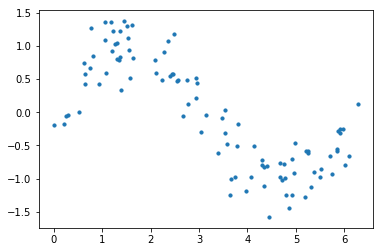

In [30]:
import numpy as np
import matplotlib.pyplot as plt

## Generating a synthetic dataset
x = np.random.rand(100,1)*2*np.pi
y = np.sin(x) + np.random.randn(100,1)*0.3
plt.scatter(x,y,s=10);

First, we will try to fit this data with a straight line.

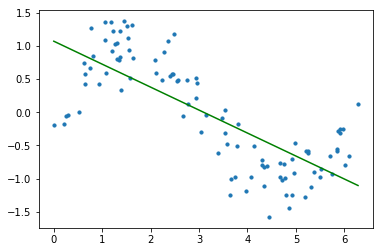

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x,y)

# Graphing the prediction line
x_ax = np.linspace(0,2*np.pi,100).reshape(-1,1)
y_pred = regr.predict(x_ax)
plt.scatter(x,y,s=10);
plt.plot(x_ax,y_pred,color='green')


The straight line does not fit the data very well. How can we improve this?

Instead of fitting it with a straight line: $y = \beta_0 + \beta_1 x$ ,

we can fit the data with a polynomial of higher order!

Polynomial of order 3:

$y = \beta_0 + \beta_1 x + \beta_2x^2 + \beta_3 x^3$

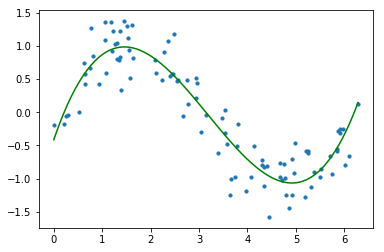

In [32]:
# First we need to transform the data into higher order, by concatenating x with x^2 and x^3
x_3 = np.hstack((x,x**2,x**3))
# After transforming the data, we can fit it using a linear regression algorithm just like before.
regr = linear_model.LinearRegression()
regr.fit(x_3,y)

# Graph the prediction curve
x_ax1 = np.linspace(0,2*np.pi,100).reshape(-1,1)
x_ax3 = np.hstack((x_ax1,x_ax1**2,x_ax1**3))
y_pred3 = regr.predict(x_ax3)
plt.scatter(x,y,s=10);
plt.plot(x_ax1,y_pred3,color='green');

We can see that polynomial of order 3 fits the data much better than the first order linear model.

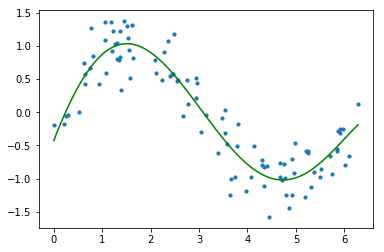

In [33]:
## Exercise: Fit the data using a polynomial of degree 5
## Try even higher order polynomials and see what happens.

## Solution
x_4 = np.hstack((x,x**2,x**3, x**4,x**5))
regr = linear_model.LinearRegression()
regr.fit(x_4,y)
x_ax1 = np.linspace(0,2*np.pi,100).reshape(-1,1)
x_ax4 = np.hstack((x_ax1,x_ax1**2,x_ax1**3,x_ax1**4,x_ax1**5))
y_pred4 = regr.predict(x_ax4)
plt.scatter(x,y,s=10);
plt.plot(x_ax1,y_pred4,color='green');

In [0]:
## In general, we can do polynomial transformation of features using a function in sklearn
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)       # transform the feature into order 2
x_transformed = poly.fit_transform(x)

Besides polynomial, we can also use other basis functions for our transformation. 

For example we can use the gaussian function: $ y = exp(-(x-\mu)/2\sigma^2)$

where $\mu$ controls the mean of the function, and $\sigma$ controls the spread.

We could transform the data into guassian basis functions with different means, and then perform linear regression.

$ y = \beta_0 + \beta_1 * gauss(x,\mu=1,\sigma = 1) + \beta_2 * gauss(x,\mu=2, \sigma = 1) + ... $

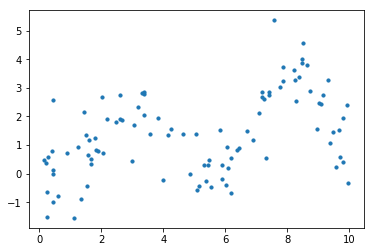

In [35]:
x = np.random.rand(100,1)*10
y = 2*np.exp(-((x-3)**2)/2) + 4*np.exp(-((x-8)**2)/2) + np.random.randn(100,1)*0.8
plt.scatter(x,y,s=10);

We can see that this data has two peaks, at 3 and at 8. We can try to fit it with gaussian functions with means of 3 and 8.

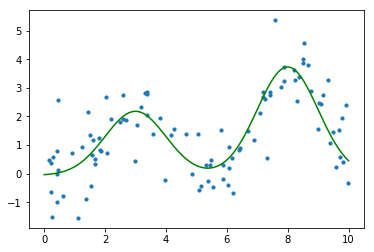

In [36]:
def gauss(x,mean,sigma):
  return np.exp(-((x-mean)**2)/(2*sigma**2))

## Exercise: transform the data into gaussian using the above function and perform regression.
# Solution
x_g = np.hstack((gauss(x,3,1),gauss(x,8,1)))
regr = linear_model.LinearRegression()
regr.fit(x_g,y)
x_ax1 = np.linspace(0,10,300).reshape(-1,1)
x_ax_g = np.hstack((gauss(x_ax1,3,1),gauss(x_ax1,8,1)))
y_pred_g = regr.predict(x_ax_g)
plt.scatter(x,y,s=10);
plt.plot(x_ax1,y_pred_g,color='green');

## Overfitting the Data
### Example: data from a 3rd order polynomial
Suppose we observe data that has a cubic relationship with respect to the input feature, ie. $y = c_0 + c_1x + c_2x^2 + c_3x^3$, where $c = [c_0, c_1, c_2, c_3]^T$ is a vector of real numbers. Our measurements of the process are unfortunately corrupted by noise, as is inevitable in all real world measurements. What we see is not $y$, but $y_m(x) = y(x) + v$, where $v$ is our noise that is independent of the input. Let's say our noise is modeled by a zero-mean Gaussian distribution with a variance $\sigma^2$, as is common with most measurement devices due to the precesence of thermal noise. 

---

We'll generate the data for the proposed scenario below.

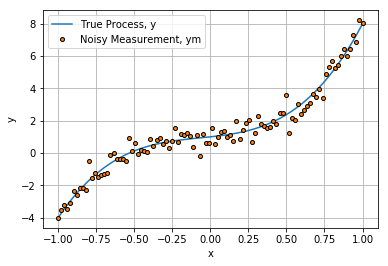

In [60]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

nsamp = 100 # number of samples taken
c = np.array([1,1,1,5]) # true process coefficients
var = 0.2 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp).reshape(-1,1)
# design matrix A
A = np.hstack((np.ones((nsamp,1)), x, x**2, x**3))
# true process output, y
y = np.matmul(A,c)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
ym = y + np.random.normal(0, np.sqrt(var), nsamp); ym = ym.reshape(-1,1)

plt.plot(x,y)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,ym,'o',ms=4,markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True Process, y','Noisy Measurement, ym']);

### Suppose we are given only the set of noisy measurements, $y_m$.
- Can we we come up with a model for the data?
- How can we use the tools we've already learned? 
- What are the parameters we will estimate?
- Do we need any more information than $y_m$?
#### Brainstorm a method for determining a model, $\hat{y}(x)$

---


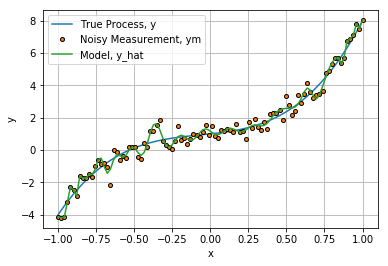

In [38]:
M = 95 # model order

# forming the design matrix 
A = np.ones((nsamp,1))
for m in range(M):
  A = np.hstack((A,x**(m+1)))
soln = np.linalg.lstsq(A,ym,rcond=None)
c_hat = soln[0];

y_hat = np.matmul(A,c_hat)

plt.plot(x,y)
plt.plot(x,ym,'o',ms=4,markeredgecolor='black');
plt.plot(x,y_hat)
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True Process, y','Noisy Measurement, ym','Model, y_hat']);

In [39]:
# residuals
NRSS = soln[1]/nsamp
print(NRSS)

[]


## Model Selection
split into train, validation, test sets

Chosen Complexity 13


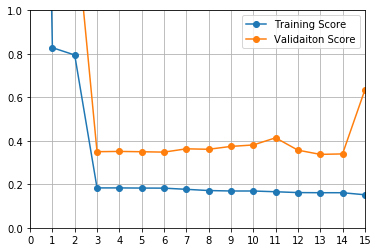

In [40]:
ntrain = int(np.round(0.8*nsamp))
nval   = int(np.round(0.1*nsamp))
ntest  = nsamp - (ntrain + nval)

s = np.arange(nsamp); np.random.shuffle(s)
ind_train = s[:ntrain]
ind_val   = s[ntrain:(ntrain+nval)]
ind_test  = s[(ntrain+nval):]

x_train = x[ind_train]; y_train = ym[ind_train]
x_val   = x[ind_val];   y_val   = ym[ind_val]
x_test  = x[ind_test];  y_test  = ym[ind_test]

M = 15
train_score = np.zeros((M+1,1))
val_score = np.zeros((M+1,1))
coefficients = []

for m in range(M+1):
  # forming the design matrix 
  A = np.ones((ntrain,1))
  for i in range(m):
    A = np.hstack((A,x_train**(i+1)))
  soln = np.linalg.lstsq(A,y_train,rcond=None)
  c_hat = soln[0]; coefficients.append(c_hat)
  trainRSS   = soln[1]
  train_score[m] = trainRSS/ntrain
  
  # validation score
  y_hat = np.polyval(np.flipud(c_hat), x_val)
  valRSS = np.sum((y_val - y_hat)**2)
  val_score[m] = valRSS/nval
  
plt.plot(train_score,'o-')
plt.plot(val_score,'o-');
plt.xticks(np.arange(M+1))
plt.xlim(0,M)
plt.ylim(0,1)
plt.grid()
plt.legend(['Training Score','Validaiton Score']);

# Model complexity can be chosen by lowest validation score
# However, this often choses an overly complex model
M = np.argmin(val_score)

print("Chosen Complexity",M)



## K-Folds validation
We can improve the precision of the training and validation scores by averaging over multiple tests. We divide the dataset into "K-folds" (see slides). We'll then select the model complexity with the smallest validation error within one **standard error**, SE, of the minimum validation score. We define the SE as the standard deviation of the score over the K-1 folds (one fold is reserved for the test set).

Chosen Model Complexity: 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars


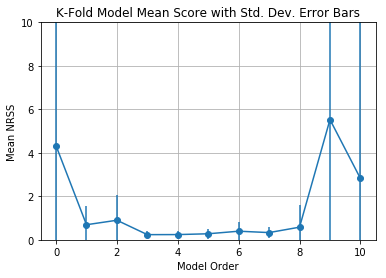

In [52]:
ntrain = int(np.round(0.9*nsamp))
ntest  = nsamp - (ntrain + nval)

s = np.arange(nsamp); np.random.shuffle(s)
ind_train = s[:ntrain]
ind_test  = s[(ntrain+nval):]

x_train = x[ind_train]; y_train = ym[ind_train]
x_test  = x[ind_test];  y_test  = ym[ind_test]

from sklearn.model_selection import KFold
K = 15
kf = KFold(K)

M = 10
# now we have a score matrix instead of score vector
S = np.zeros((K,M+1))

# loop over K-folds
# splitting the training set again into train and validation sets
k = 0;
for it, iv in kf.split(x_train):
  x_ktrain = x[it]; y_ktrain = ym[it]
  x_val   = x[iv];   y_val   = ym[iv]
  # loop over model complexity 1-M
  for m in range(M+1):
    # forming the design matrix 
    A = np.ones_like(x_ktrain)
    for i in range(m):
      A = np.hstack((A,x_ktrain**(i+1)))
    soln = np.linalg.lstsq(A,y_ktrain,rcond=None)
    c_hat = soln[0]
    
    # validation score
    y_hat = np.polyval(np.flipud(c_hat), x_val)
    S[k,m] = np.sum((y_val - y_hat)**2) / x_val.shape[0]
  # increaes fold index
  k+=1
  
S_mean = np.mean(S,axis=0)
p = np.argmin(S_mean)
S_std  = np.std(S,axis=0)
SE = S_std[p]/np.sqrt(K-1)

i=0
for i in range(M+1):
  if S_mean[i] < S_mean[p]+SE:
    break
p_model = i

# make model with chosen complexity, p_model, using all training data
A = np.ones_like(x_train)
for i in range(p_model):
  A = np.hstack((A,x_train**(i+1)))
soln = np.linalg.lstsq(A,y_train,rcond=None)
c_hat = soln[0]

# evaluate model on test data
y_hat = np.polyval(np.flipud(c_hat),x_test)
NRSS = np.sum((y_test - y_hat)**2) / ntest

print("Chosen Model Complexity:",p_model)

plt.errorbar(np.arange(M+1), S_mean, yerr=S_std, fmt='o-')
plt.ylim(0,10)
plt.grid()
plt.xlabel('Model Order')
plt.ylabel('Mean NRSS')
plt.title('K-Fold Model Mean Score with Std. Dev. Error Bars');

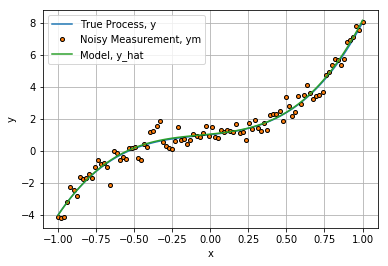

In [51]:
# forming design matrix on all the data to plot final model 
y_hat = np.polyval(np.flipud(c_hat), x)

plt.plot(x,y)
plt.plot(x,ym,'o',ms=4,markeredgecolor='black');
plt.plot(x,y_hat)
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True Process, y','Noisy Measurement, ym','Model, y_hat']);

In [43]:
# process coefficients vs. final model coefficents
print("True Process Coefficeints",c)
print("Final Model Coefficients",c_hat.flatten())

True Process Coefficeints [1 1 1 5]
Final Model Coefficients [1.01629665 0.81787582 1.00670918 5.28842232]
